In [7]:
import casperfpga
from casperfpga import snapadc
import logging
logger=logging.getLogger('pmc')
logging.basicConfig(filename='pmc.log',level=logging.DEBUG)
snap=casperfpga.CasperFpga('192.168.2.100',69,logger=logger)

ERROR:tornado.application:Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOLoop object at 0x7f8c847e4640>>, <Future finished exception=KatcpClientError("Failed to connect to ('192.168.2.100', 69)")>)
Traceback (most recent call last):
  File "/home/wei/Software/miniconda3/envs/py38_debugging/lib/python3.8/site-packages/tornado/ioloop.py", line 740, in _run_callback
    ret = callback()
  File "/home/wei/Software/miniconda3/envs/py38_debugging/lib/python3.8/site-packages/tornado/ioloop.py", line 764, in _discard_future_result
    future.result()
  File "/home/wei/Software/miniconda3/envs/py38_debugging/lib/python3.8/site-packages/tornado/gen.py", line 782, in run
    yielded = self.gen.send(value)
  File "/home/wei/Software/miniconda3/envs/py38_debugging/lib/python3.8/site-packages/katcp/client.py", line 682, in _install
    raise KatcpClientError("Failed to connect to {0!r}"
katcp.core.KatcpClientError: Failed to co

In [8]:
snap.upload_to_ram_and_program('fpg/dsa10_2022-11-02_1656.fpg')

False

In [9]:
snap.adcs

[]

In [6]:
snap.is_connected()

False

In [10]:
snap.listdev()

['acc_16',
 'acc_full',
 'acc_len',
 'adc16_controller',
 'adc16_use_synth',
 'adc16_wb_ram0',
 'adc16_wb_ram1',
 'adc16_wb_ram2',
 'adc_snap_bram',
 'adc_snap_ctrl',
 'adc_snap_status',
 'adc_trig',
 'coeff1',
 'debug1_pfb',
 'debug2_pfb',
 'debug3_pfb',
 'debug4_pfb',
 'debug_eq_dat',
 'del1',
 'del2',
 'del3',
 'del4',
 'del5',
 'del6',
 'del7',
 'del8',
 'eq_0_coeffs',
 'eq_1_coeffs',
 'eq_2_coeffs',
 'eq_3_coeffs',
 'eq_clip',
 'eth1_ctrl',
 'eth1_gbe1',
 'eth1_sw_status',
 'eth_ctrl',
 'eth_gbe0',
 'eth_sw_status',
 'fft_of_count',
 'fft_shift',
 'force_sync',
 'ip',
 'ip1',
 'lmx_ctrl',
 'port',
 'port1',
 'raw1',
 'raw2',
 'reg_arm',
 'scaling',
 'sel1',
 'snap_index',
 'sys_block',
 'sys_board_id',
 'sys_clkcounter',
 'sys_rev',
 'sys_rev_rcs',
 'sys_scratchpad']

In [11]:
snap.transport.get_metadata()

{'sector_size': '65536',
 'header_start': '8454144',
 'header_length': '65536',
 'prog_bitstream_start': '8519680',
 'prog_bitstream_length': '6692572',
 'md5sum': 'b7146831041d09ff39dd0a03043485eb',
 'filename': 'dsa10_2022-11-02_1656.fpg'}

In [12]:
snap.get_system_information(filename='fpg/dsa10m_2022-11-02_1656.fpg',initialise_objects=False)

In [13]:
adc=snap.adcs['snap_adc']

In [14]:
adc.selectADC()
adc.init(sample_rate=500,numChannel=2)

File in flash is:  dsa10_2022-11-02_1656.fpg


In [5]:
adc.resolution

8

In [15]:
gbe0=snap.gbes['eth_gbe0']
gbe1=snap.gbes['eth1_gbe1']

In [16]:
gbe0.get_gbe_core_details()

{'ip_prefix': '192.168.5',
 'ip': IpAddress(192.168.5.20),
 'subnet_mask': IpAddress(255.255.255.0),
 'mac': Mac(12:34:56:78:00:00),
 'gateway_ip': IpAddress(0.0.0.1),
 'fabric_port': 10000,
 'fabric_en': 0,
 'multicast': {'base_ip': IpAddress(255.255.255.255),
  'ip_mask': IpAddress(255.255.255.255),
  'rx_ips': []}}

In [17]:
gbe1.get_gbe_core_details()

{'ip_prefix': '192.168.5',
 'ip': IpAddress(192.168.5.20),
 'subnet_mask': IpAddress(255.255.255.0),
 'mac': Mac(00:08:0B:C4:17:01),
 'gateway_ip': IpAddress(0.0.0.1),
 'fabric_port': 10000,
 'fabric_en': 0,
 'multicast': {'base_ip': IpAddress(255.255.255.255),
  'ip_mask': IpAddress(255.255.255.255),
  'rx_ips': []}}

In [14]:
adc.snapshot()

In [15]:
data=adc.readRAM()

In [31]:
data[0][1]

array([ 124, -124, -124,  124, -124, -112,  123, -124])

In [22]:
import matplotlib.pyplot as plt

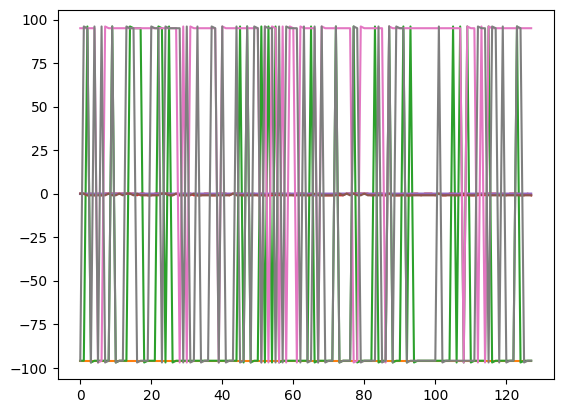

In [25]:
plt.plot(data[2])
plt.show()

In [18]:
src_mac  = "00:08:0b:c4:17:01"
src_ip   = "192.168.2.100"
src_port = 4000
gbe1.configure_core(src_mac, src_ip, src_port)
gbe1.get_gbe_core_details()

{'ip_prefix': '192.168.2',
 'ip': IpAddress(192.168.2.100),
 'subnet_mask': IpAddress(255.255.255.0),
 'mac': Mac(00:08:0B:C4:17:01),
 'gateway_ip': IpAddress(0.0.0.1),
 'fabric_port': 4000,
 'fabric_en': 1,
 'multicast': {'base_ip': IpAddress(255.255.255.255),
  'ip_mask': IpAddress(255.255.255.255),
  'rx_ips': []}}

In [23]:
gbe1_dst_mac  = 0xf452141624a0
# write register requires a int vaule, but set_single_arp_entry requires a string
gbe1_dst_ip   = 192*(2**24) + 168*(2**16) + 2*(2**8) + 1
gbe1_dst_ip_str='192.168.2.1'
gbe1_dst_port = 4015
snap.registers['ip1'].write_int(gbe1_dst_ip)
snap.registers['port1'].write_int(gbe1_dst_port)
gbe1.set_single_arp_entry(gbe1_dst_ip_str,gbe1_dst_mac)
gbe1.get_arp_details()

[Mac(FF:FF:FF:FF:FF:FF),
 Mac(F4:52:14:16:24:A0),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),
 Mac(FF:FF:FF:FF:FF:FF),


In [22]:
gbe1.set_single_arp_entry('192.168.2.1',0xf452141624a0)

In [24]:
gbe1.fabric_enable()

In [25]:
import time
# set acc len
snap.registers['acc_len'].write_int(127)
# full rst
snap.registers['force_sync'].write_int(2) 
time.sleep(0.1)
# sync
snap.registers['force_sync'].write_int(1)
time.sleep(0.1)
snap.registers['force_sync'].write_int(0)

In [26]:
snap.registers['scaling'].write_int(0)